# Linear Regression with Python Scikit Learn

We are doing simple Linear Regression using scitit Learn for the given data

# Prediction Using Supervised Linear Regression:

In [4]:
#Importing important libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read The Dataset-

In [5]:
path_url =  "http://bit.ly/w-data"
Data_score = pd.read_csv(path_url)
print("Data is successfully imported")
Data_score

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#let's read the top 5 records;
Data_score.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#let's read the bottom 5 records;
Data_score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#let,s check the shape of the data
Data_score.shape

(25, 2)

In [9]:
#there are 25 records and 2 columns available.

In [10]:
#let,s describe the data and see the 5 point summery of the data.
Data_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* Count of hours and score is 25.

* Average hours are 5 hours and average score is 51.48

* The std of hours 2.52 and std of score is 25.28

* The minimum hours is 1 hour and minimum score is 17

* The max hours is 9.2 and score is 95

In [11]:
#let's check the information
Data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

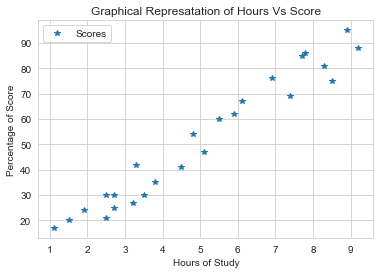

In [12]:
# Plotting the distribution of scores
sns.set_style('whitegrid')
Data_score.plot(x='Hours', y='Scores', style='*')  
plt.title('Graphical Represatation of Hours Vs Score')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage of Score')  
plt.show()

#### From the above graph we can see that their is a possitive linear relation between hours of study and the percentage of scores 

# Now Prepare The Data First For Further Prediction :

Now divide the data into Input and Output.

In [13]:
X = Data_score.iloc[:, :-1].values  
y = Data_score.iloc[:, 1].values  

Now that we have our inputs and output,Now split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

## Now It's time to Training the Algorithm :

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linreg= LinearRegression()  

In [35]:
linreg.fit(X_train, y_train)
print("Training the model is finished")

Training the model is finished


In [36]:
print("B0 =",linreg.intercept_)
print("B1 =",linreg.coef_)

B0 = 2.018160041434683
B1 = [9.91065648]


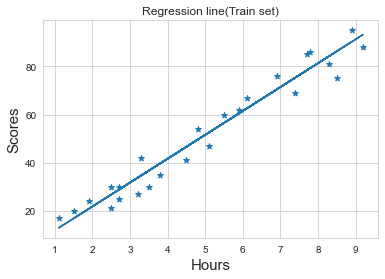

In [37]:
# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(X, y,marker='*')
plt.plot(X, line)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)")
plt.show()

# Now Test The Data and Do The Prediction:

Now that we have trained our algorithm, it's time to make some predictions

In [41]:
# Testing data - In Hours
print(y_test)

[20 27 69 30 62]


In [42]:
 # Predicting the scores
y_pred = linreg.predict(X_test) 
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


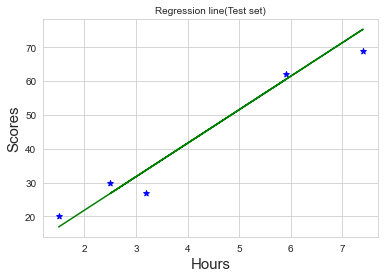

In [46]:
#plotting line on test data
plt.plot(X_test,y_pred,color='green')
plt.scatter(X_test,y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## Comparing Actual vs Predicted

In [43]:
# Comparing Actual vs Predicted
df_pred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## The Model Accuracy:

In [47]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

As we can see the accuracy is above 94%.So we can clearly see that our model is a good fit model.

## Error Prediction :

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
MSE = metrics.mean_squared_error(y_test,y_pred)
root_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


## Score Prediction:

In [51]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


## CONCLUSION:

From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS.